## Importing the required dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
fraudulent = pd.read_csv("Fraud (2).csv")
fraudulent

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## EDA

## Dropping the irrelevant columns

In [3]:
fraudulent = fraudulent.drop(['nameOrig', 'nameDest'], axis=1)
fraudulent

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [4]:
fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [5]:
fraudulent.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
fraudulent.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Target Unbalance

<AxesSubplot:ylabel='isFraud'>

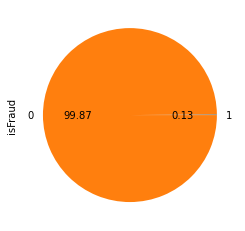

In [7]:
fraudulent.isFraud.value_counts().sort_values().plot(kind = 'pie', autopct="%0.2f")

In [8]:
num_0 = len(fraudulent[fraudulent['isFraud']==0])
num_1 = len(fraudulent[fraudulent['isFraud']==1])
print(num_0,num_1)

6354407 8213


## Performing Under Sampling because target is highly unbalanced 

In [9]:
fraudulent = pd.concat([ fraudulent[fraudulent['isFraud']==0].sample(num_1) , fraudulent[fraudulent['isFraud']==1]])
print(len(fraudulent))

16426


In [10]:
fraudulent

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5410268,378,CASH_OUT,147944.45,0.00,0.00,2088639.02,2236583.47,0,0
1588957,155,CASH_OUT,99128.18,9638.00,0.00,664996.51,764124.69,0,0
5483713,379,CASH_IN,241939.23,21978.56,263917.79,513541.20,271601.97,0,0
6340597,692,CASH_OUT,66945.32,678168.00,611222.68,3250752.46,3317697.78,0,0
4791657,345,CASH_OUT,325492.84,6332.00,0.00,3686229.96,4182736.49,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


<AxesSubplot:ylabel='isFraud'>

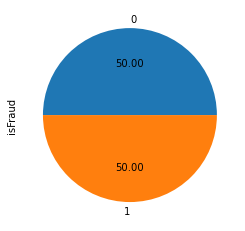

In [11]:
fraudulent.isFraud.value_counts().sort_values().plot(kind = 'pie', autopct="%0.2f")

In [12]:
fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 5410268 to 6362619
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [13]:
fraudulent['type'].value_counts()

CASH_OUT    6947
TRANSFER    4757
PAYMENT     2770
CASH_IN     1898
DEBIT         54
Name: type, dtype: int64

## Applying target encoder on type column

In [14]:
from category_encoders import TargetEncoder
fraudulent = TargetEncoder(cols=['type'], smoothing=1.0).fit(fraudulent, fraudulent['isFraud']).transform(fraudulent)

In [15]:
fraudulent

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5410268,378,0.592486,147944.45,0.00,0.00,2088639.02,2236583.47,0,0
1588957,155,0.592486,99128.18,9638.00,0.00,664996.51,764124.69,0,0
5483713,379,0.000000,241939.23,21978.56,263917.79,513541.20,271601.97,0,0
6340597,692,0.592486,66945.32,678168.00,611222.68,3250752.46,3317697.78,0,0
4791657,345,0.592486,325492.84,6332.00,0.00,3686229.96,4182736.49,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,0.592486,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,0.861257,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,0.592486,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,0.861257,850002.52,850002.52,0.00,0.00,0.00,1,0


## Visually inspecting correlation between features and target variable

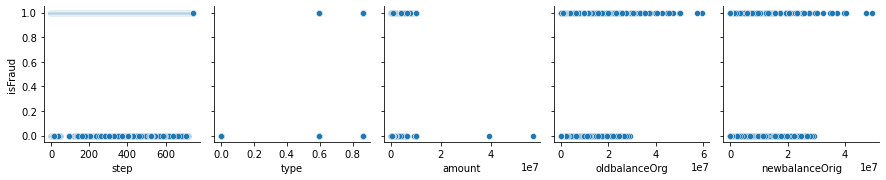

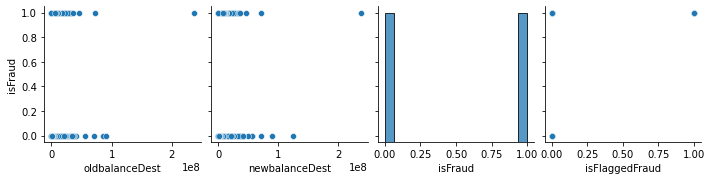

In [16]:
for i in range(0, len(fraudulent.columns), 5):
    sns.pairplot(data=fraudulent,
                x_vars=fraudulent.columns[i:i+5],
                y_vars=['isFraud'])

# Creating Heatmap

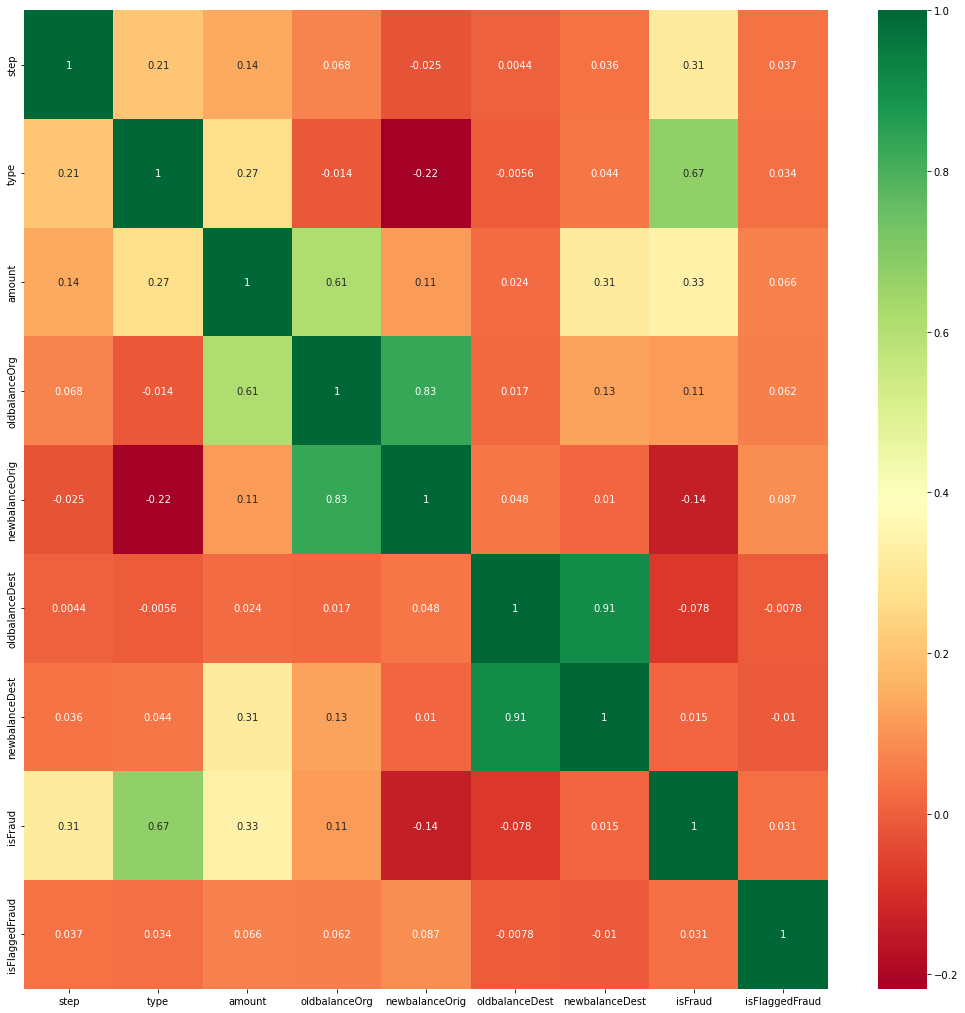

In [17]:
plt.figure(figsize=(18,18))
sns.heatmap(fraudulent.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [18]:
features = fraudulent.corr()['isFraud'].sort_values(ascending= False)
features

isFraud           1.000000
type              0.673143
amount            0.334598
step              0.313228
oldbalanceOrg     0.114486
isFlaggedFraud    0.031225
newbalanceDest    0.014865
oldbalanceDest   -0.078077
newbalanceOrig   -0.138184
Name: isFraud, dtype: float64

## Visualising Outliers 

<AxesSubplot:>

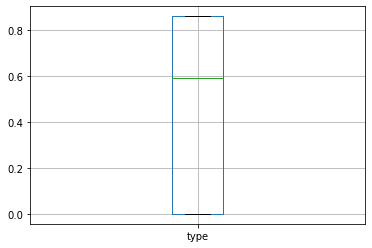

In [19]:
fraudulent.boxplot(column='type')

<AxesSubplot:>

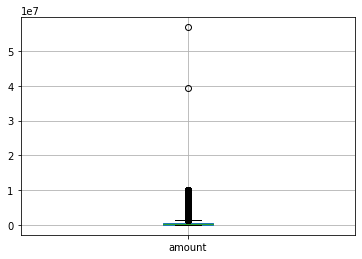

In [20]:
fraudulent.boxplot(column='amount')

<AxesSubplot:>

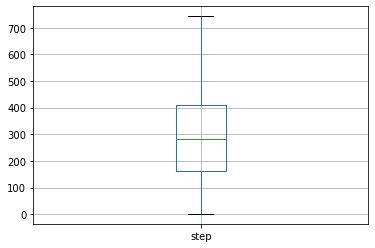

In [21]:
fraudulent.boxplot(column='step')

<AxesSubplot:>

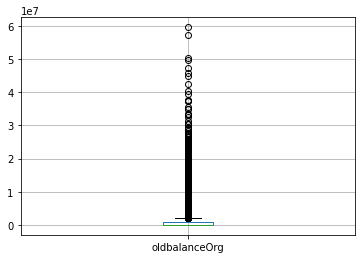

In [22]:
fraudulent.boxplot(column='oldbalanceOrg')

In [23]:
fraudulent['oldbalanceOrg'].describe()

count    1.642600e+04
mean     1.269205e+06
std      3.323333e+06
min      0.000000e+00
25%      1.070850e+04
50%      1.195741e+05
75%      8.024683e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [24]:
fraudulent['oldbalanceOrg'].mean()

1269204.6977176417

In [25]:
fraudulent['oldbalanceOrg'].max()

59585040.37

In [26]:
iqr_2 = fraudulent.oldbalanceOrg.quantile(0.75)-fraudulent.oldbalanceOrg.quantile(0.25)
iqr_2

791759.7575000001

In [27]:
### Extreme outliers
lower_bridge_2=fraudulent['oldbalanceOrg'].quantile(0.25)-(iqr_2*3)
upper_bridge_2=fraudulent['oldbalanceOrg'].quantile(0.75)+(iqr_2*3)
print(lower_bridge_2), print(upper_bridge_2)


-2364570.7725
3177747.5300000003


(None, None)

In [28]:
fraudulent = fraudulent.copy()

In [29]:
fraudulent.loc[fraudulent['oldbalanceOrg']>=3114905.0625,'oldbalanceOrg']=3114905.0625


<AxesSubplot:>

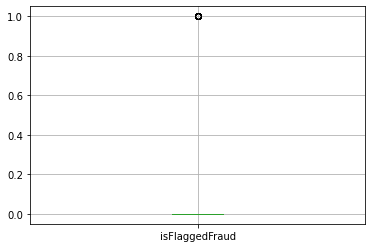

In [30]:
fraudulent.boxplot(column='isFlaggedFraud')

<AxesSubplot:>

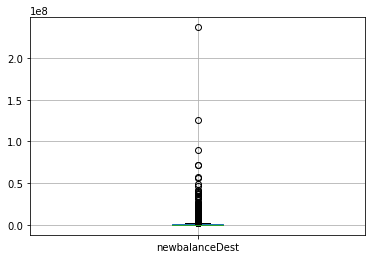

In [31]:
fraudulent.boxplot(column='newbalanceDest')

In [32]:
fraudulent['newbalanceDest'].describe()

count    1.642600e+04
mean     1.225392e+06
std      3.654101e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.210278e+05
75%      1.042936e+06
max      2.367265e+08
Name: newbalanceDest, dtype: float64

In [33]:
fraudulent['newbalanceDest'].mean()

1225392.3362553269

In [34]:
fraudulent['newbalanceDest'].max()

236726494.66

In [35]:
iqr_3 = fraudulent.newbalanceDest.quantile(0.75)-fraudulent.newbalanceDest.quantile(0.25)
iqr_3

1042935.6924999999

In [36]:
## Extreme outliers
lower_bridge_5=fraudulent['newbalanceDest'].quantile(0.25)-(iqr_3*3)
upper_bridge_5=fraudulent['newbalanceDest'].quantile(0.75)+(iqr_3*3)
print(lower_bridge_5), print(upper_bridge_5)


-3128807.0774999997
4171742.7699999996


(None, None)

In [37]:
fraudulent.loc[fraudulent['newbalanceDest']>=4389142.58,'newbalanceDest']=4389142.58


In [38]:
fraudulent

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5410268,378,0.592486,147944.45,0.000000e+00,0.00,2088639.02,2236583.47,0,0
1588957,155,0.592486,99128.18,9.638000e+03,0.00,664996.51,764124.69,0,0
5483713,379,0.000000,241939.23,2.197856e+04,263917.79,513541.20,271601.97,0,0
6340597,692,0.592486,66945.32,6.781680e+05,611222.68,3250752.46,3317697.78,0,0
4791657,345,0.592486,325492.84,6.332000e+03,0.00,3686229.96,4182736.49,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,0.592486,339682.13,3.396821e+05,0.00,0.00,339682.13,1,0
6362616,743,0.861257,6311409.28,3.114905e+06,0.00,0.00,0.00,1,0
6362617,743,0.592486,6311409.28,3.114905e+06,0.00,68488.84,4389142.58,1,0
6362618,743,0.861257,850002.52,8.500025e+05,0.00,0.00,0.00,1,0


In [39]:
features = fraudulent.corr()['isFraud'].sort_values(ascending= False)
features

isFraud           1.000000
type              0.673143
amount            0.334598
step              0.313228
oldbalanceOrg     0.277032
isFlaggedFraud    0.031225
newbalanceDest    0.013342
oldbalanceDest   -0.078077
newbalanceOrig   -0.138184
Name: isFraud, dtype: float64

## Creating dependent and independent variables

In [40]:
X = fraudulent[[ 'type', 'amount', 'step', 'oldbalanceOrg', 'isFlaggedFraud', 'newbalanceDest']]
Y = fraudulent[['isFraud']]

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [43]:
X_train

array([[ 0.2787615 , -0.21847266,  1.25435308, -0.25851051, -0.03265862,
        -0.08681444],
       [ 0.2787615 ,  1.43885667, -0.82353545,  2.31738083, -0.03265862,
         2.01390449],
       [ 0.2787615 , -0.38399917, -1.50065832, -0.64666192, -0.03265862,
        -0.21678448],
       ...,
       [-1.47856825, -0.43024492, -0.63745588, -0.36657043, -0.03265862,
        -0.62049916],
       [ 1.0759441 , -0.41013353,  0.2412532 , -0.60623555, -0.03265862,
        -0.62049916],
       [ 1.0759441 , -0.22417521, -1.40244966, -0.64666192, -0.03265862,
         1.35783953]])

In [44]:
X_test

array([[-1.47856825, -0.40494212,  1.69887649, -0.61106948, -0.03265862,
        -0.62049916],
       [ 0.2787615 , -0.31817531, -0.15158145, -0.64134456, -0.03265862,
        -0.1150635 ],
       [ 0.2787615 , -0.42001723,  2.13306216, -0.62416728, -0.03265862,
        -0.49962338],
       ...,
       [ 0.2787615 , -0.40432454, -0.4978962 , -0.64666192, -0.03265862,
        -0.45069137],
       [ 0.2787615 , -0.32310308,  0.21540882, -0.64666192, -0.03265862,
        -0.18640885],
       [ 0.2787615 ,  0.09488798,  1.57482345,  0.31001107, -0.03265862,
         1.37565564]])

## Applying PCA

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.32903881, 0.18906698, 0.16614702, 0.13552012])

## Hyperparameter tuning for XGBoost Algorithm

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [48]:
classifier=xgboost.XGBClassifier()

In [49]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "verbosity"        : [0,1,2,3],
 "booster"          : ['gbtree', 'gblinear'],
 "validate_parameters" : ['false', 'true'],
 "disable_default_eval_metric" : ['false', 'true'],
 "eta"                         : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
 "tree_method"                 : ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
 "process_type"                : ['default', 'update'],
 "refresh_leaf"                : [0, 1],
 "grow_policy"                 : ['depthwise', 'lossguide'],
 "predictor"                   : ['cpu_predictor', 'gpu_predictor', 'auto', 'predictor']
 
    
}

In [50]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [51]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth", "min_child_weight", "predictor", "process_type", "refresh_leaf", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          

In [52]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, disable_default_eval_metric='false',
              early_stopping_rounds=None, enable_categorical=False, eta=0.7,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              predictor='gpu_predictor', process_type='update', ...)

In [53]:
random_search.best_params_

{'verbosity': 2,
 'validate_parameters': 'false',
 'tree_method': 'gpu_hist',
 'refresh_leaf': 0,
 'process_type': 'update',
 'predictor': 'gpu_predictor',
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.3,
 'grow_policy': 'depthwise',
 'gamma': 0.1,
 'eta': 0.7,
 'disable_default_eval_metric': 'false',
 'colsample_bytree': 0.7,
 'booster': 'gblinear'}

## Applying XGBoost Classifier

In [54]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              disable_default_eval_metric='false', early_stopping_rounds=None,
              enable_categorical=False, eta=0.7, eval_metric=None, gamma=0.1,
              gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              predictor='cpu_predictor', process_type='default')
classifier.fit(X_train, y_train)

[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=8
[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 2 pruned nodes, max_depth=8
[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=8
[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=8
[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 2 pruned nodes, max_depth=8
[22:21:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              disable_default_eval_metric='false', early_stopping_rounds=None,
              enable_categorical=False, eta=0.7, eval_metric=None, gamma=0.1,
              gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              predictor='cpu_predictor', process_type='default', ...)

## Predicting test set result

In [55]:
y_pred = classifier.predict(X_test)

## Creating Confusion Matrix, Precision, Recall, Accuracy Score and F1_Score.

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[1536  107]
 [ 147 1496]]
0.9332501559575795
0.9105295191722459


In [57]:
from sklearn.metrics import  accuracy_score, f1_score
Accuracy = accuracy_score(y_test, y_pred)
print(Accuracy)
F1_score = f1_score(y_test, y_pred)
print(F1_score)

0.9227023737066342
0.9217498459642637


## Applying K-Fold cross validation

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=8
[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=8
[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=8
[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=8
[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=8
[22:21:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0

## Applying ANN

## Initializing the ANN

In [59]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [60]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the second hidden layer

In [61]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the output layer

In [62]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [63]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [64]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
411/411 [==============================] - 1s 1ms/step - loss: 0.4801 - accuracy: 0.8043
Epoch 2/150
411/411 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8514
Epoch 3/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8727
Epoch 4/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8854
Epoch 5/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.8920
Epoch 6/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.8957
Epoch 7/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.8986
Epoch 8/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9019
Epoch 9/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.9033
Epoch 10/150
411/411 [==============================] - 0s 1ms/step - loss: 0.2176 - accura

## Predicting the Test set results

In [65]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

103/103 [==============================] - 0s 751us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

# QUESTIONS


## 1) In the data cleaning process, we found that there were no null values in the whole dataset secondly, we worked on the outliers we visualized all the outliers. In every single numerical column and then we have resolved the outliers in oldbalanceOrg and newbalanceDest and we have not removed the outliers from the amount column because, during fraudulent transactions prediction, some outliers are informative and provide useful insights into our data. 
 
## And we have also visualized the correlation between the target value and different features and found the highly correlated features

## 

## 2) First, I loaded the necessary libraries and carried out the fundamental EDA step, checking for null values, dropping unnecessary columns, and determining whether the target was  unbalance or not.


## --> After finishing the EDA portion, I worked on the feature engineering, under sampling the target variable (because it was highly unbalanced), and applying the target encoder to the type column. I then produced a heatmap to help me identify the highly correlated features. After that, I used a boxplot to plot outliers on every single column and resolved them in two of the numerical columns.

## --> Furthermore, I used principal component analysis and tuned the hyperparameter for the XGBoost algorithm and found the optimal XGBoost classifier parameter. After that, I used the XGBoost classifier to predict the outcome of the test set and determine the precision, recall, accuracy, confusion matrix and the F1 score for the algorithm. Further computed the KFold Cross Validation score on the train set.

## --> Finally, I put the deep learning model artificial neural network into practise and calculated its accuracy, which was 93%.


## 3) To select the right variables we have used the feature selection method. There are many methods for feature selection, building the heatmap and calculating the correlation coefficient scores are the most commonly used ones.

## The features which have a high and good correlation coefficient scores have been selected in model creation.




## 4) We have used different metrics like confusion matrix, accuracy, f1 score, precision, and recall to evaluate our model and we have also used the K-Fold cross-validation technique to evaluate our model.

## 5) 5. Key Factors -
## i) Dealing with outliers
## ii) Feature Selection
## iii) Correct Algorithm selection

## 6)

## Yes all the above factors make sense.
## Explanation -

## An outlier is an observation in data that is distant from most other observations. Typically, these observations are aberrations and do not accurately represent the phenomenon we are trying to explain through the model.

## -->If we do not identify and deal with outliers, they can have a significant impact on the model.

## -->It is really important to remember that some outliers are informative and provide some insights into the data.


## ii) Feature selection is an important process in a machine learning model because it increases the predictive power of machine learning algorithms by selecting the most important variables and eliminating redundant and irrelevant features.
## iii) Choosing the correct machine learning algorithm is the most important process because generally during fraudulent detection it is sometimes important to not remove the outliers because it can give some important insights so, in that case, we have to use the algorithm which is insensitive to outliers.
## --> Moreover, by using the proper algorithms, organizations can expect to benefit from stronger data insights that reflect the unique conditions that guide each business process. As their algorithms continually learn and improve, so will the data-driven decision that results.

## 7) Model Improvement -

## Data Drift: There are quite possible chances that new features might get added which influence isFraud or the data might change over some time, to make sure model performance doesn’t depreciate over some time, the model-auto training pipeline can be maintained using MLOps.
## ii) Feature Engineering: Understanding important features, removing multicollinearity, adding more features, etc. can be done to help improve model performance.

## iii) Model: Experiments can be done with different ML algorithms on our dataset to get to a model which fits best.
## iv) Handling Unbalance in the dataset by either getting more consistent data, undersampling or oversampling.

## 8) For this purpose, A machine learning engineer or a data scientist is required to examine the new model and point out the updated changes